In [335]:
import networkx as nx
import numpy as np
from IPython.display import SVG
from sknetwork.visualization import svg_graph
from sknetwork.data import Bunch
import pandas as pd
import scipy.sparse as sp


def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):
    if not isinstance(G, nx.Graph):
        raise ValueError("Input graph must be a NetworkX Graph object.")

    adjacency = nx.to_numpy_array(G, nodelist=None, dtype=None, order=None, multigraph_weight=sum, weight='weight', nonedge=0.0)
    adjacency = sp.csr_matrix(adjacency)
    #adjacency = nx.to_numpy_array(G, weight='weight', multigraph_weight=sum)
    names = np.array(list(G.nodes()))
    print(names)
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = names

    if show_names and 'names' not in graph:
        raise ValueError("Graph must have node names if show_names is True.")

    image = svg_graph(
        graph.adjacency,  # Remove unused pagerank scores
        edge_width=edge_width,
        display_node_weight=True,
        node_size=node_size,
        font_size=font_size,
        names=graph.names if show_names else None,
        width=1024,
        height=1024,
        margin=0,
        scale=1.0,
        node_color="lightblue",
        edge_color="black",
        filename=None,
        directed=False,

    )

    return SVG(image)

# creating a graph from an edgelist

In [336]:
import pandas as pd 
import networkx as nx 

In [337]:
data = 'peter_network.csv' 

network_df = pd.read_csv(data) 

network_df.head() 

,source,target
0,Wendy,Napoleon
1,Wendy,Darling
2,Darling,Brussels
3,John,Wendy
4,John,Michael


# creating different types of graphs

In [338]:
G = nx.from_pandas_edgelist(network_df) 
G

In [339]:
G = nx.from_pandas_edgelist(network_df, create_using=nx.DiGraph) 
G

In [340]:
G = nx.from_pandas_edgelist(network_df, create_using=nx.MultiGraph) 
G

In [341]:
G = nx.from_pandas_edgelist(network_df, create_using=nx.MultiDiGraph) 
G

# summarizing graphs

In [342]:
G = nx.from_pandas_edgelist(network_df) 

In [343]:
print(G) 

Graph with 91 nodes and 128 edges


# listing nodes

In [344]:
G.nodes

NodeView(('Wendy', 'Napoleon', 'Darling', 'Brussels', 'John', 'Michael', 'Fulsom', 'Nana', 'Newfoundland', 'Darlings', 'George', 'Peter', 'Neverlands', 'Peter Pan', 'Mark', 'England', 'George,', 'Tink', 'Tinker Bell', 'Angela Darling', 'Wendy Moira', 'Cinderella', 'Liza', 'Hook', 'Blackbeard', 'ford', 'redskins', 'Flint', 'Skylights (', 'Noodler', 'Morgan’s Skylights', 'Black Murphy', 'Gentleman Starkey', 'Cookson', 'Mullins', 'Alf Mason', 'Jas', 'James Hook', 'Charles II', 'Stuarts', 'Delawares', 'Piccaninny', 'Piccaninnies', 'coquettish', 'Dianas', 'Tootles', 'Smee', 'Johnny Corkscrew', 'crocodile', 'Nibs', 'Wendies', 'Hullo', 'THE LITTLE HOUSE', 'Puss', 'Margery', 'Robin', 'Inmate', 'Kennel', 'Redskin', 'Tiger Lily', 'Tinker Bell’s', 'Marooners’ Rock', 'Starkey', 'Luff', 'Roger_', 'Curly', 'Hurrah', 'Grandly', 'Barbecue', 'Lean Wolf', 'Geo', 'Scourie', 'Chas', 'Turley', 'the Alsatian Foggerty', 'Panther', 'Pan', 'pertinacity', 'Bill Jukes', 'begirt', 'Creek', 'Kidd', 'Davy Jones', '

In [345]:
def show_nodes(G): 

    nodes = sorted(list(G.nodes())) 

    return ', '.join(nodes) 

In [346]:
show_nodes(G)

'Alf Mason, Angela Darling, Azores, Barbecue, Bill Jukes, Black Murphy, Blackbeard, Brussels, Charles II, Chas, Cinderella, Cookson, Creek, Curly, Darling, Darlings, Davy Jones, Delawares, Dianas, England, Flint, Fulsom, Gentleman Starkey, Geo, George, George,, Grandly, Hook, Hullo, Hurrah, I., Inmate, James Hook, Jane, Jas, John, Johnny Corkscrew, Jukes, Kennel, Kidd, Lean Wolf, Liza, Long Tom, Luff, Margaret, Margery, Mark, Marooners’ Rock, Michael, Morgan’s Skylights, Mullins, Nana, Napoleon, Neverlands, Newfoundland, Nibs, Noodler, Pan, Panther, Peter, Peter Pan, Piccaninnies, Piccaninny, Puss, Redskin, Rio, Robin, Roger_, Scourie, Skylights (, Smee, Starkey, Stuarts, THE LITTLE HOUSE, Tiger Lily, Tink, Tinker Bell, Tinker Bell’s, Tootles, Turley, Wendies, Wendy, Wendy Moira, begirt, coquettish, crocodile, ford, pertinacity, redskins, the Alsatian Foggerty, yo ho'

# listing edges

In [347]:
G.edges

EdgeView([('Wendy', 'Napoleon'), ('Wendy', 'Darling'), ('Wendy', 'John'), ('Wendy', 'Michael'), ('Wendy', 'Peter'), ('Wendy', 'George'), ('Wendy', 'Nana'), ('Wendy', 'Cinderella'), ('Wendy', 'Tink'), ('Wendy', 'Tinker Bell'), ('Wendy', 'THE LITTLE HOUSE'), ('Wendy', 'Nibs'), ('Wendy', 'Hook'), ('Wendy', 'Tinker Bell’s'), ('Wendy', 'Pan'), ('Wendy', 'Curly'), ('Wendy', 'Tootles'), ('Wendy', 'Hullo'), ('Wendy', 'Jane'), ('Wendy', 'I.'), ('Darling', 'Brussels'), ('Darling', 'George'), ('Darling', 'Peter'), ('Darling', 'Peter Pan'), ('Darling', 'England'), ('Darling', 'Nana'), ('Darling', 'John'), ('Darling', 'Michael'), ('John', 'Michael'), ('John', 'Fulsom'), ('John', 'Neverlands'), ('John', 'Nana'), ('John', 'Peter'), ('John', 'Hook'), ('John', 'Blackbeard'), ('John', 'Tinker Bell'), ('John', 'Starkey'), ('John', 'Hullo'), ('Michael', 'Nana'), ('Michael', 'Peter'), ('Michael', 'Curly'), ('Michael', 'Hook'), ('Nana', 'Newfoundland'), ('Nana', 'Darlings'), ('Nana', 'Mark'), ('Nana', 'Geor

# removing nodes

In [348]:
G.remove_node('Alf Mason')

In [349]:
drop_nodes = ['yo ho',' the Alsatian Foggerty','redskins','pertinacity','THE LITTLE HOUSE','Stuarts','Smee','Skylights (','Roger_','Morgan’s Skylights','Marooners’ Rock','I.'] 
drop_nodes = [node.strip() for node in drop_nodes]
G.remove_nodes_from(drop_nodes) 

In [350]:
show_nodes(G) 

'Angela Darling, Azores, Barbecue, Bill Jukes, Black Murphy, Blackbeard, Brussels, Charles II, Chas, Cinderella, Cookson, Creek, Curly, Darling, Darlings, Davy Jones, Delawares, Dianas, England, Flint, Fulsom, Gentleman Starkey, Geo, George, George,, Grandly, Hook, Hullo, Hurrah, Inmate, James Hook, Jane, Jas, John, Johnny Corkscrew, Jukes, Kennel, Kidd, Lean Wolf, Liza, Long Tom, Luff, Margaret, Margery, Mark, Michael, Mullins, Nana, Napoleon, Neverlands, Newfoundland, Nibs, Noodler, Pan, Panther, Peter, Peter Pan, Piccaninnies, Piccaninny, Puss, Redskin, Rio, Robin, Scourie, Starkey, Tiger Lily, Tink, Tinker Bell, Tinker Bell’s, Tootles, Turley, Wendies, Wendy, Wendy Moira, begirt, coquettish, crocodile, ford'

# quick visual inspection

['Wendy' 'Napoleon' 'Darling' 'Brussels' 'John' 'Michael' 'Fulsom' 'Nana'
 'Newfoundland' 'Darlings' 'George' 'Peter' 'Neverlands' 'Peter Pan'
 'Mark' 'England' 'George,' 'Tink' 'Tinker Bell' 'Angela Darling'
 'Wendy Moira' 'Cinderella' 'Liza' 'Hook' 'Blackbeard' 'ford' 'Flint'
 'Noodler' 'Black Murphy' 'Gentleman Starkey' 'Cookson' 'Mullins' 'Jas'
 'James Hook' 'Charles II' 'Delawares' 'Piccaninny' 'Piccaninnies'
 'coquettish' 'Dianas' 'Tootles' 'Johnny Corkscrew' 'crocodile' 'Nibs'
 'Wendies' 'Hullo' 'Puss' 'Margery' 'Robin' 'Inmate' 'Kennel' 'Redskin'
 'Tiger Lily' 'Tinker Bell’s' 'Starkey' 'Luff' 'Curly' 'Hurrah' 'Grandly'
 'Barbecue' 'Lean Wolf' 'Geo' 'Scourie' 'Chas' 'Turley' 'Panther' 'Pan'
 'Bill Jukes' 'begirt' 'Creek' 'Kidd' 'Davy Jones' 'Jukes' 'Rio'
 'Long Tom' 'Azores' 'Jane' 'Margaret']


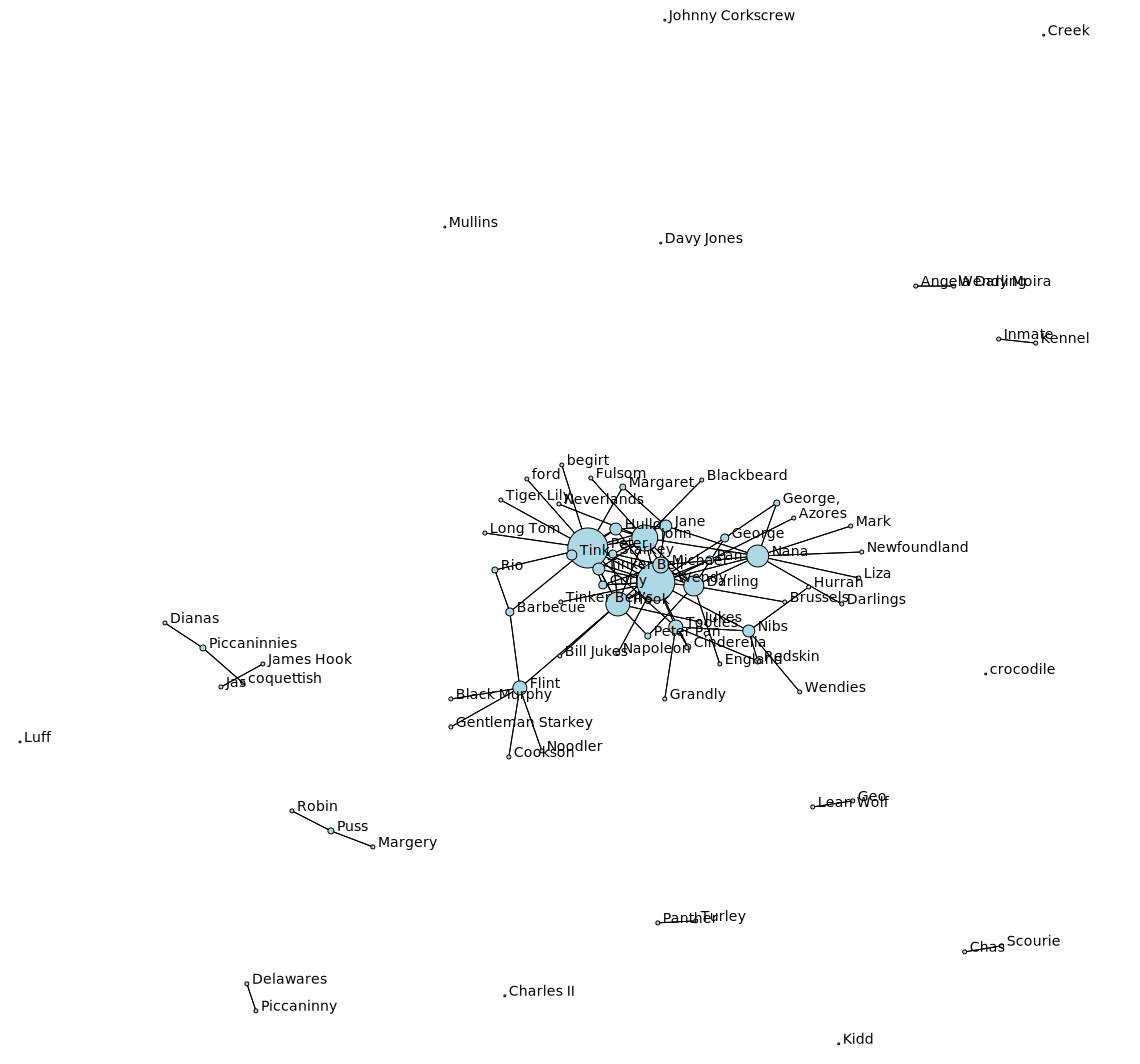

In [351]:
draw_graph(G, show_names=True, node_size=5, edge_width=1, font_size=14) 

In [352]:
drop_nodes = ['Charles II','Fulsom','Creek','Neverlands','Luff','Kidd','Scourie','crocodile','Davy Jones','Wendy Moira','Angela Darling','Blackbeard','Johnny Corkscrew'] 
drop_nodes = [node.strip() for node in drop_nodes]
G.remove_nodes_from(drop_nodes) 

['Wendy' 'Napoleon' 'Darling' 'Brussels' 'John' 'Michael' 'Nana'
 'Newfoundland' 'Darlings' 'George' 'Peter' 'Peter Pan' 'Mark' 'England'
 'George,' 'Tink' 'Tinker Bell' 'Cinderella' 'Liza' 'Hook' 'ford' 'Flint'
 'Noodler' 'Black Murphy' 'Gentleman Starkey' 'Cookson' 'Mullins' 'Jas'
 'James Hook' 'Delawares' 'Piccaninny' 'Piccaninnies' 'coquettish'
 'Dianas' 'Tootles' 'Nibs' 'Wendies' 'Hullo' 'Puss' 'Margery' 'Robin'
 'Inmate' 'Kennel' 'Redskin' 'Tiger Lily' 'Tinker Bell’s' 'Starkey'
 'Curly' 'Hurrah' 'Grandly' 'Barbecue' 'Lean Wolf' 'Geo' 'Chas' 'Turley'
 'Panther' 'Pan' 'Bill Jukes' 'begirt' 'Jukes' 'Rio' 'Long Tom' 'Azores'
 'Jane' 'Margaret']


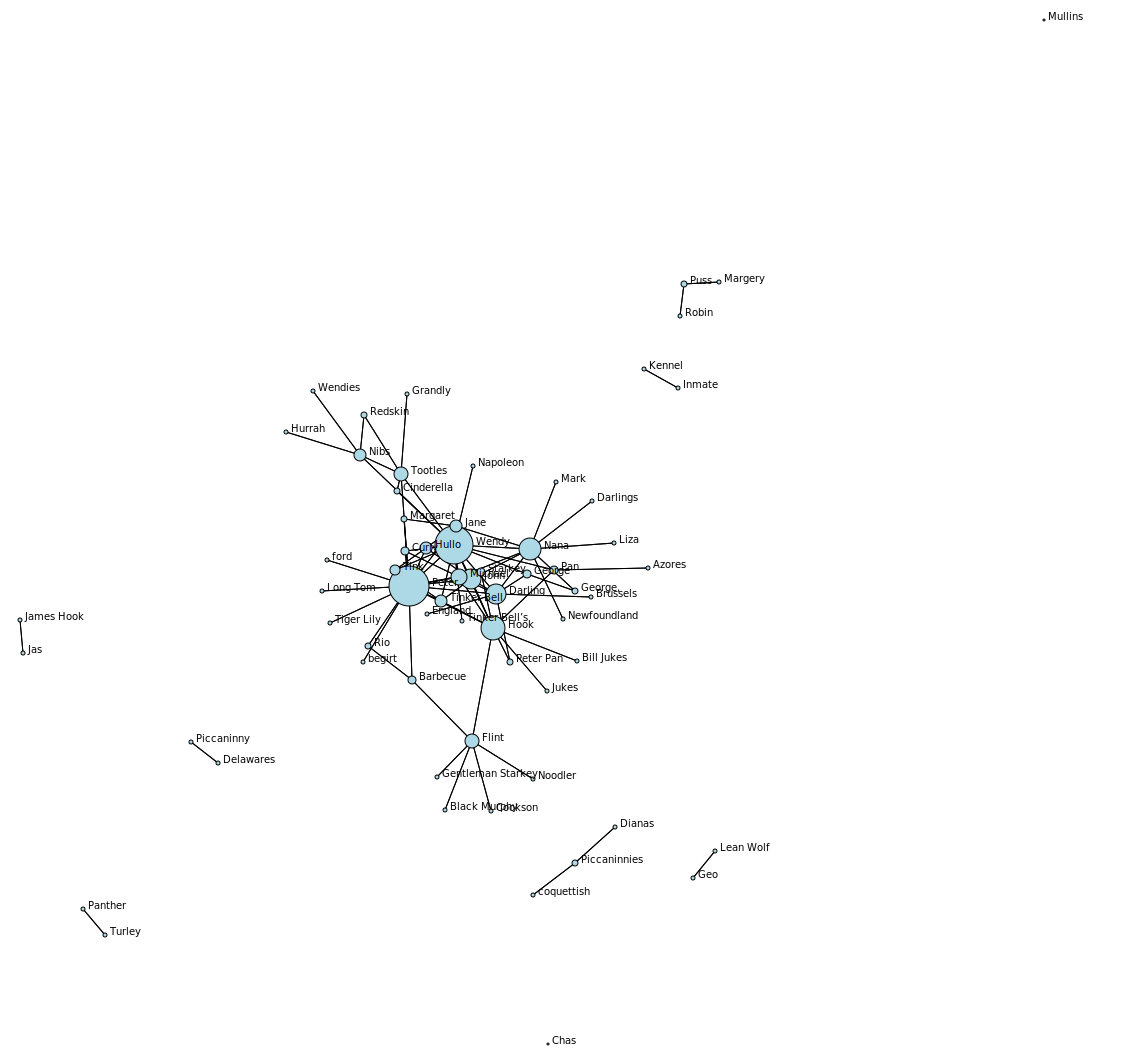

In [353]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

# search text for node mentions

In [354]:
import requests
def get_data(): 

    url = 'https://www.gutenberg.org/cache/epub/16/pg16.txt' 
    text = requests.get(url).text 

    # strip header junk 
    cutoff = text.index('All children') 
    text = text[cutoff:] 

    # strip footer junk 
    cutoff = text.rindex('*** END OF THE PROJECT GUTENBERG EBOOK PETER PAN ***') 
    text = text[:cutoff] 

    # pre-processing to clean the text 
    text = text.replace('\r', ' ').replace('\n', ' ') 
    text = text.replace('â\x80\x99', '\'').replace('â\x80\x9c', '"').replace('â\x80\x9d', '""').replace('â\x80\x94', ' ') 

    return text 

In [355]:
from nltk.tokenize import sent_tokenize 

def search_text(text, search_string): 

    sentences = sent_tokenize(text) 

    for sentence in sentences: 

        if search_string in sentence.lower(): 

            print(sentence) 
            print() 

In [356]:
text = get_data()

search_text(text, 'peter pan')

There never was a simpler happier family  until the coming of Peter Pan.

“But who is he, my pet?”    “He is Peter Pan, you know, mother.”    At first Mrs.

Darling did not know, but after thinking back into her  childhood she just remembered a Peter Pan who was said to live with the  fairies.

She started up with a cry, and saw the boy, and somehow she knew at  once that he was Peter Pan.

“What  is your name?”    “Peter Pan.”    She was already sure that he must be Peter, but it did seem a  comparatively short name.

“Wake up,” she cried, “Peter Pan has come and he is to  teach us to fly.”    John rubbed his eyes.

But it was now ten minutes since three scoundrels had been breathing  behind the curtains, and Peter Pan can do a great deal in ten minutes.

Such is the terrible man against whom Peter Pan is pitted.

“Most of all,” Hook was saying passionately, “I want their captain,  Peter Pan.

“Did you hear them say Peter Pan’s from home?” Smee whispered,  fidgeting with Johnny Corksc

# adding nodes

In [357]:
G.add_node('peter pan') 

In [358]:
#add_nodes = ['cry', 'George', 'Mother', 'Wendy', 'Nana', 'Darling',  
 #            'Peter', 'John', 'THE FLIGHT', 'Michael'] 

#G.add_nodes_from(add_nodes) 

['Wendy' 'Napoleon' 'Darling' 'Brussels' 'John' 'Michael' 'Nana'
 'Newfoundland' 'Darlings' 'George' 'Peter' 'Peter Pan' 'Mark' 'England'
 'George,' 'Tink' 'Tinker Bell' 'Cinderella' 'Liza' 'Hook' 'ford' 'Flint'
 'Noodler' 'Black Murphy' 'Gentleman Starkey' 'Cookson' 'Mullins' 'Jas'
 'James Hook' 'Delawares' 'Piccaninny' 'Piccaninnies' 'coquettish'
 'Dianas' 'Tootles' 'Nibs' 'Wendies' 'Hullo' 'Puss' 'Margery' 'Robin'
 'Inmate' 'Kennel' 'Redskin' 'Tiger Lily' 'Tinker Bell’s' 'Starkey'
 'Curly' 'Hurrah' 'Grandly' 'Barbecue' 'Lean Wolf' 'Geo' 'Chas' 'Turley'
 'Panther' 'Pan' 'Bill Jukes' 'begirt' 'Jukes' 'Rio' 'Long Tom' 'Azores'
 'Jane' 'Margaret' 'peter pan']


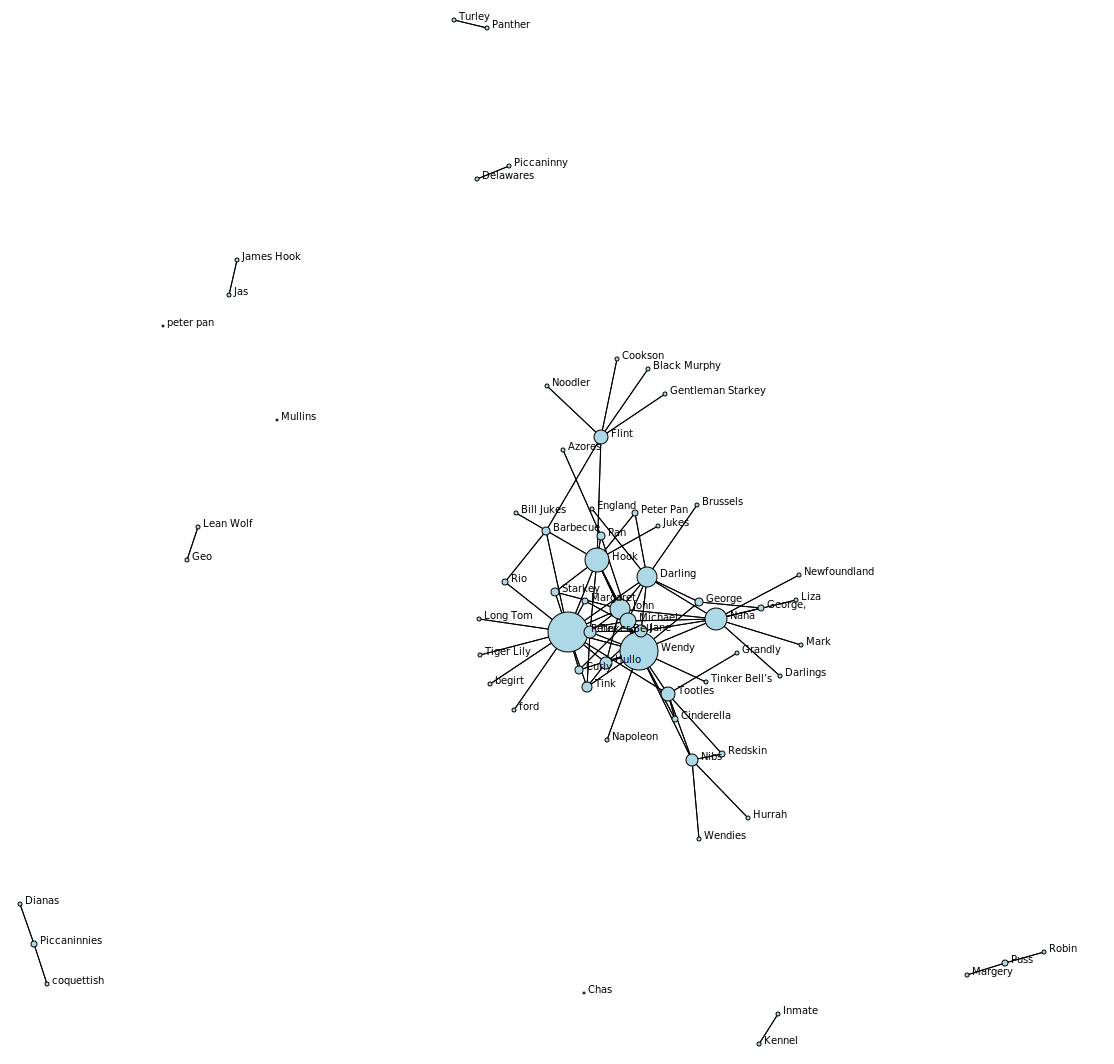

In [359]:
draw_graph(G, show_names=True, node_size=5, edge_width=1, font_size=10) 

# adding edges

In [360]:
G.add_edge('peter pan', 'wendy') 

In [361]:
#add_edges = [('Peter', 'Mock Turtle'), ('King of Hearts', 'Peter'), ('King of Hearts', 'Card Gardener #1'),  
#             ('King of Hearts', 'Card Gardener #2'), ('King of Hearts', 'Card Gardener #3'),  
#             ('King of Hearts', 'Dormouse'), ('King of Hearts', 'Frog-Footman'), ('King of Hearts', 'Kings'),  
#             ('King of Hearts', 'Lizard'), ('King of Hearts', 'Mad Hatter'), ('King of Hearts', 'March Hare'),  
##             ('King of Hearts', 'Mock Turtle'), ('King of Hearts', 'Queen of Hearts'), ('King of Hearts', 'Queens'),  
#             ('King of Hearts', 'White Rabbit'), ('Knave of Hearts', 'King of Hearts'),  
#             ('Knave of Hearts', 'Queen of Hearts'), 
#             ('Queen of Hearts', 'Peter'), ('Queen of Hearts', 'Card Gardener #1'),  
#             ('Queen of Hearts', 'Card Gardener #2'), ('Queen of Hearts', 'Card Gardener #3'),  
#             ('Queen of Hearts', 'Dormouse'), ('Queen of Hearts', 'Frog-Footman'), ('Queen of Hearts', 'Kings'),  
#             ('Queen of Hearts', 'Lizard'), ('Queen of Hearts', 'Mad Hatter'), ('Queen of Hearts', 'March Hare'),  
#             ('Queen of Hearts', 'Mock Turtle'), ('Queen of Hearts', 'Queens'), ('Queen of Hearts', 'White Rabbit')] 

G.add_edges_from(add_edges) 

['Wendy' 'Napoleon' 'Darling' 'Brussels' 'John' 'Michael' 'Nana'
 'Newfoundland' 'Darlings' 'George' 'Peter' 'Peter Pan' 'Mark' 'England'
 'George,' 'Tink' 'Tinker Bell' 'Cinderella' 'Liza' 'Hook' 'ford' 'Flint'
 'Noodler' 'Black Murphy' 'Gentleman Starkey' 'Cookson' 'Mullins' 'Jas'
 'James Hook' 'Delawares' 'Piccaninny' 'Piccaninnies' 'coquettish'
 'Dianas' 'Tootles' 'Nibs' 'Wendies' 'Hullo' 'Puss' 'Margery' 'Robin'
 'Inmate' 'Kennel' 'Redskin' 'Tiger Lily' 'Tinker Bell’s' 'Starkey'
 'Curly' 'Hurrah' 'Grandly' 'Barbecue' 'Lean Wolf' 'Geo' 'Chas' 'Turley'
 'Panther' 'Pan' 'Bill Jukes' 'begirt' 'Jukes' 'Rio' 'Long Tom' 'Azores'
 'Jane' 'Margaret' 'peter pan' 'wendy' 'tom']


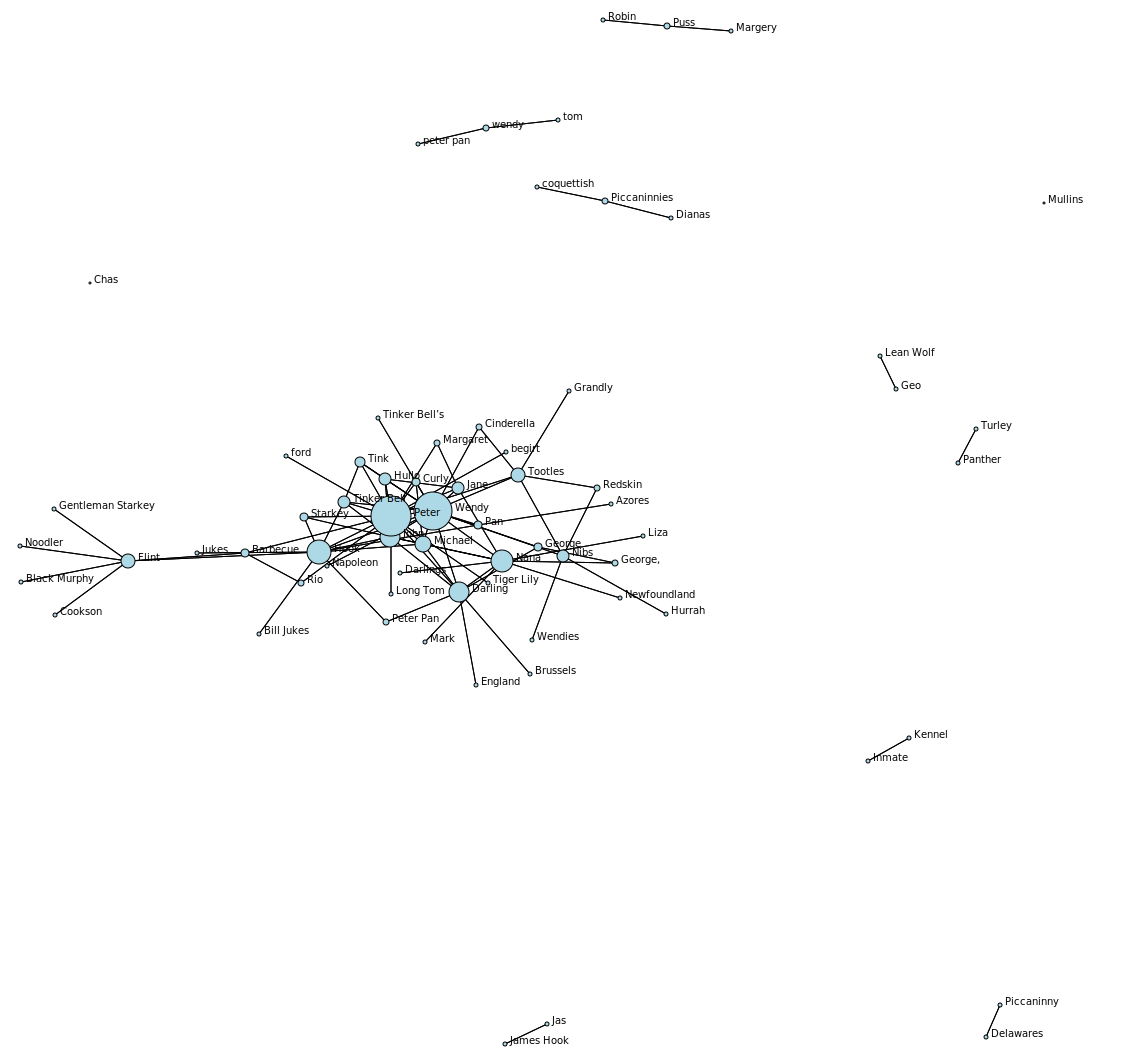

In [362]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

In [363]:
search_text(text, 'tom') 

It is the nightly custom of every good mother after  her children are asleep to rummage in their minds and put things  straight for next morning, repacking into their proper places the many  articles that have wandered during the day.

When you wake in the morning, the  naughtiness and evil passions with which you went to bed have been  folded up small and placed at the bottom of your mind and on the top,  beautifully aired, are spread out your prettier thoughts, ready for you  to put on.

When people in our set are introduced, it is customary for them to ask  each other’s age, and so Wendy, who always liked to do the correct  thing, asked Peter how old he was.

“She tells me,” he said, “that the pirates sighted us before the  darkness came, and got Long Tom out.”    “The big gun?”    “Yes.

The pirates had fired Long Tom at them.

He thinks he remembers the  days before he was lost, with their manners and customs, and this has  given his nose an offensive tilt.

Curly is fourth; he is

In [364]:
add_edges = [('tom', 'wendy')] 

G.add_edges_from(add_edges) 

['Wendy' 'Napoleon' 'Darling' 'Brussels' 'John' 'Michael' 'Nana'
 'Newfoundland' 'Darlings' 'George' 'Peter' 'Peter Pan' 'Mark' 'England'
 'George,' 'Tink' 'Tinker Bell' 'Cinderella' 'Liza' 'Hook' 'ford' 'Flint'
 'Noodler' 'Black Murphy' 'Gentleman Starkey' 'Cookson' 'Mullins' 'Jas'
 'James Hook' 'Delawares' 'Piccaninny' 'Piccaninnies' 'coquettish'
 'Dianas' 'Tootles' 'Nibs' 'Wendies' 'Hullo' 'Puss' 'Margery' 'Robin'
 'Inmate' 'Kennel' 'Redskin' 'Tiger Lily' 'Tinker Bell’s' 'Starkey'
 'Curly' 'Hurrah' 'Grandly' 'Barbecue' 'Lean Wolf' 'Geo' 'Chas' 'Turley'
 'Panther' 'Pan' 'Bill Jukes' 'begirt' 'Jukes' 'Rio' 'Long Tom' 'Azores'
 'Jane' 'Margaret' 'peter pan' 'wendy' 'tom']


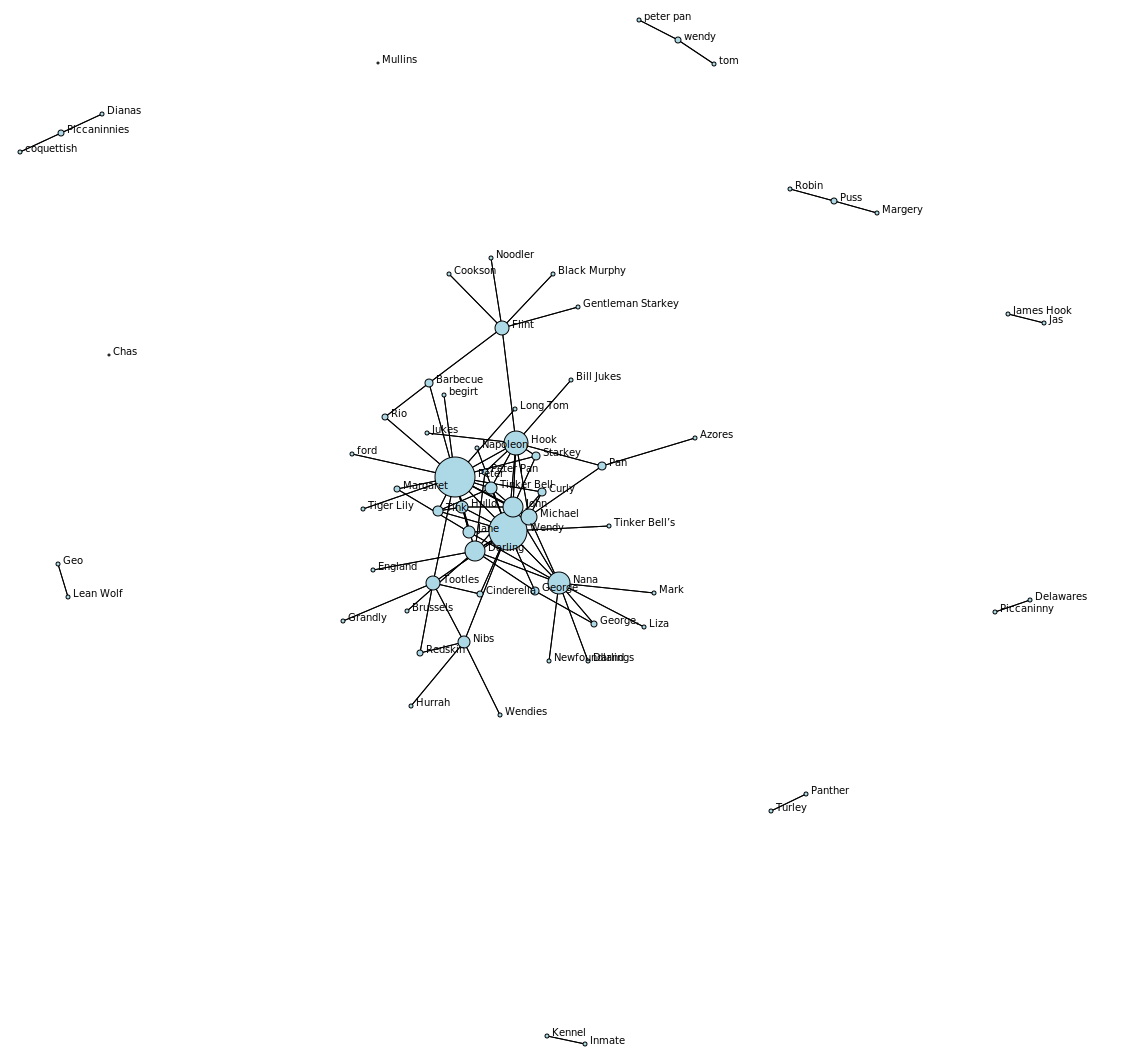

In [365]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

# renaming nodes

In [366]:
relabel_mapping = {'THE LITTLE HOUSE':'peter house'} 

G = nx.relabel_nodes(G, relabel_mapping) 

In [367]:
show_nodes(G) 

'Azores, Barbecue, Bill Jukes, Black Murphy, Brussels, Chas, Cinderella, Cookson, Curly, Darling, Darlings, Delawares, Dianas, England, Flint, Gentleman Starkey, Geo, George, George,, Grandly, Hook, Hullo, Hurrah, Inmate, James Hook, Jane, Jas, John, Jukes, Kennel, Lean Wolf, Liza, Long Tom, Margaret, Margery, Mark, Michael, Mullins, Nana, Napoleon, Newfoundland, Nibs, Noodler, Pan, Panther, Peter, Peter Pan, Piccaninnies, Piccaninny, Puss, Redskin, Rio, Robin, Starkey, Tiger Lily, Tink, Tinker Bell, Tinker Bell’s, Tootles, Turley, Wendies, Wendy, begirt, coquettish, ford, peter pan, tom, wendy'

['Wendy' 'Napoleon' 'Darling' 'Brussels' 'John' 'Michael' 'Nana'
 'Newfoundland' 'Darlings' 'George' 'Peter' 'Peter Pan' 'Mark' 'England'
 'George,' 'Tink' 'Tinker Bell' 'Cinderella' 'Liza' 'Hook' 'ford' 'Flint'
 'Noodler' 'Black Murphy' 'Gentleman Starkey' 'Cookson' 'Mullins' 'Jas'
 'James Hook' 'Delawares' 'Piccaninny' 'Piccaninnies' 'coquettish'
 'Dianas' 'Tootles' 'Nibs' 'Wendies' 'Hullo' 'Puss' 'Margery' 'Robin'
 'Inmate' 'Kennel' 'Redskin' 'Tiger Lily' 'Tinker Bell’s' 'Starkey'
 'Curly' 'Hurrah' 'Grandly' 'Barbecue' 'Lean Wolf' 'Geo' 'Chas' 'Turley'
 'Panther' 'Pan' 'Bill Jukes' 'begirt' 'Jukes' 'Rio' 'Long Tom' 'Azores'
 'Jane' 'Margaret' 'peter pan' 'wendy' 'tom']


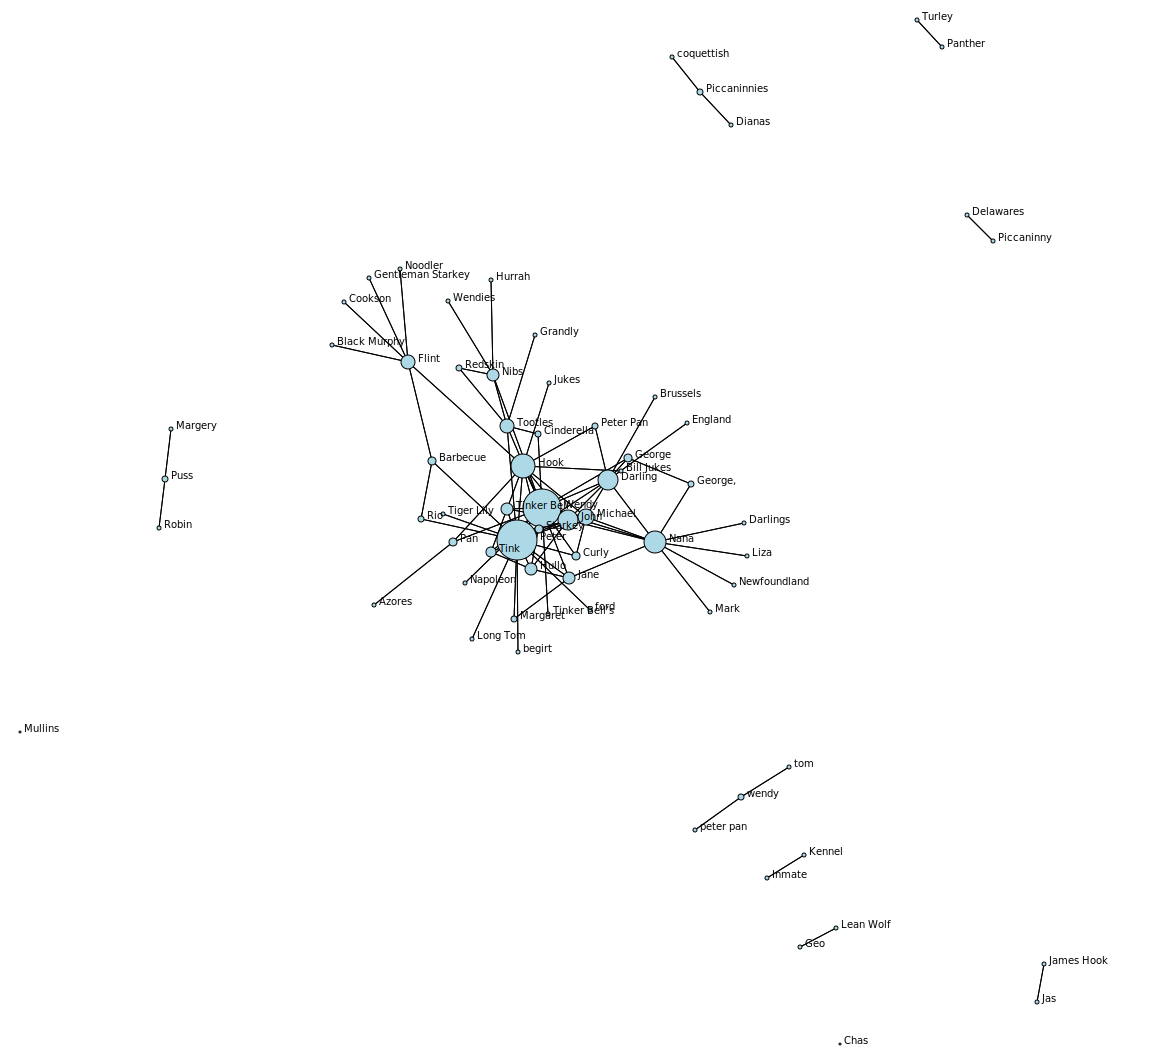

In [368]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

# removing edges

In [369]:
#G.remove_edge('', 'cry') 

In [370]:
drop_edges = [('Dormouse', 'Tillie'), ('Dormouse', 'Elsie'), ('Dormouse', 'Lacie')] 

G.remove_edges_from(drop_edges) 

['Wendy' 'Napoleon' 'Darling' 'Brussels' 'John' 'Michael' 'Nana'
 'Newfoundland' 'Darlings' 'George' 'Peter' 'Peter Pan' 'Mark' 'England'
 'George,' 'Tink' 'Tinker Bell' 'Cinderella' 'Liza' 'Hook' 'ford' 'Flint'
 'Noodler' 'Black Murphy' 'Gentleman Starkey' 'Cookson' 'Mullins' 'Jas'
 'James Hook' 'Delawares' 'Piccaninny' 'Piccaninnies' 'coquettish'
 'Dianas' 'Tootles' 'Nibs' 'Wendies' 'Hullo' 'Puss' 'Margery' 'Robin'
 'Inmate' 'Kennel' 'Redskin' 'Tiger Lily' 'Tinker Bell’s' 'Starkey'
 'Curly' 'Hurrah' 'Grandly' 'Barbecue' 'Lean Wolf' 'Geo' 'Chas' 'Turley'
 'Panther' 'Pan' 'Bill Jukes' 'begirt' 'Jukes' 'Rio' 'Long Tom' 'Azores'
 'Jane' 'Margaret' 'peter pan' 'wendy' 'tom']


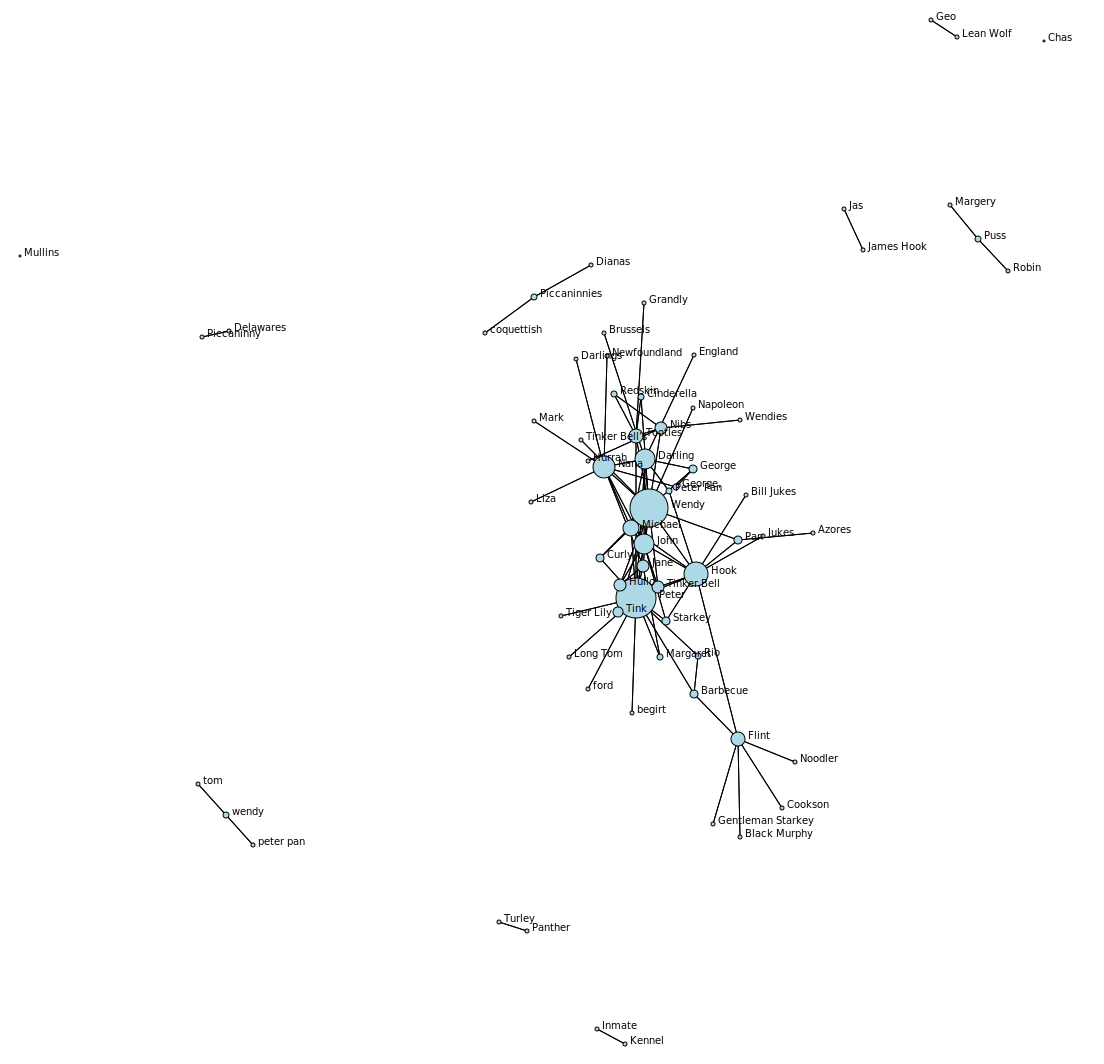

In [371]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

In [372]:
#add_edges = [('Dormouse', 'Elsie'), ('Dormouse', 'Lacie'), ('Dormouse', 'Tillie')] 

In [373]:
#add_edges = [('Dormouse', 'Elsie'), ('Dormouse', 'Lacie'), ('Dormouse', 'Tillie')] 

G.add_edges_from(add_edges) 

['Wendy' 'Napoleon' 'Darling' 'Brussels' 'John' 'Michael' 'Nana'
 'Newfoundland' 'Darlings' 'George' 'Peter' 'Peter Pan' 'Mark' 'England'
 'George,' 'Tink' 'Tinker Bell' 'Cinderella' 'Liza' 'Hook' 'ford' 'Flint'
 'Noodler' 'Black Murphy' 'Gentleman Starkey' 'Cookson' 'Mullins' 'Jas'
 'James Hook' 'Delawares' 'Piccaninny' 'Piccaninnies' 'coquettish'
 'Dianas' 'Tootles' 'Nibs' 'Wendies' 'Hullo' 'Puss' 'Margery' 'Robin'
 'Inmate' 'Kennel' 'Redskin' 'Tiger Lily' 'Tinker Bell’s' 'Starkey'
 'Curly' 'Hurrah' 'Grandly' 'Barbecue' 'Lean Wolf' 'Geo' 'Chas' 'Turley'
 'Panther' 'Pan' 'Bill Jukes' 'begirt' 'Jukes' 'Rio' 'Long Tom' 'Azores'
 'Jane' 'Margaret' 'peter pan' 'wendy' 'tom']


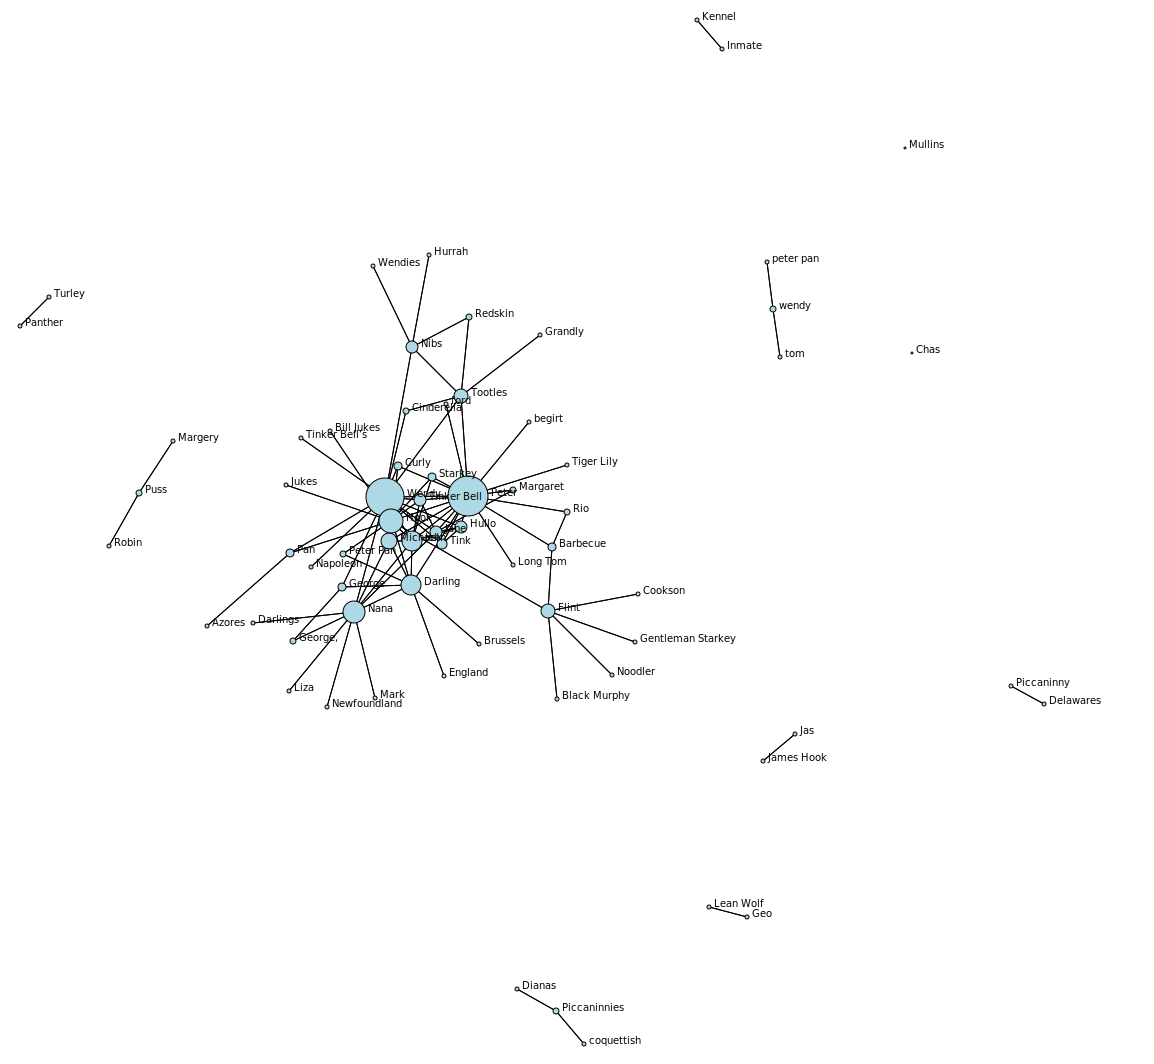

In [374]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

In [375]:
# attack simulation

In [376]:
drop_nodes = []

G.remove_nodes_from(drop_nodes) 

['Wendy' 'Napoleon' 'Darling' 'Brussels' 'John' 'Michael' 'Nana'
 'Newfoundland' 'Darlings' 'George' 'Peter' 'Peter Pan' 'Mark' 'George,'
 'Tink' 'Tinker Bell' 'Liza' 'Hook' 'ford' 'Flint' 'Noodler'
 'Black Murphy' 'Gentleman Starkey' 'Cookson' 'Mullins' 'Jas' 'James Hook'
 'Delawares' 'Piccaninny' 'Piccaninnies' 'coquettish' 'Dianas' 'Tootles'
 'Nibs' 'Wendies' 'Hullo' 'Puss' 'Margery' 'Robin' 'Inmate' 'Kennel'
 'Redskin' 'Tiger Lily' 'Tinker Bell’s' 'Starkey' 'Curly' 'Hurrah'
 'Grandly' 'Barbecue' 'Lean Wolf' 'Geo' 'Chas' 'Turley' 'Panther' 'Pan'
 'Bill Jukes' 'begirt' 'Jukes' 'Rio' 'Long Tom' 'Azores' 'Jane' 'Margaret'
 'peter pan' 'wendy' 'tom']


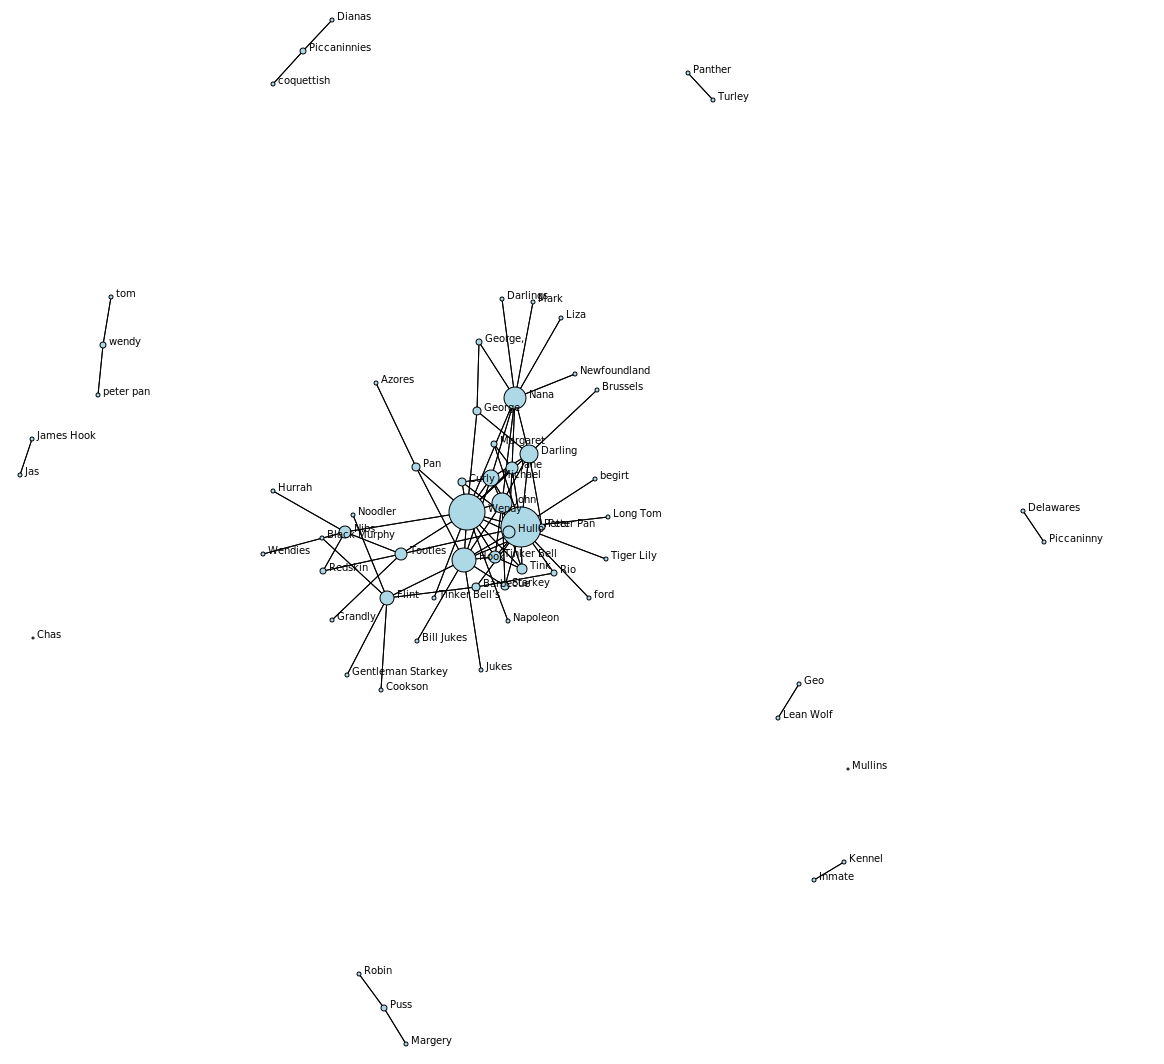

In [377]:
draw_graph(G, show_names=True, node_size=5, edge_width=1) 

['Piccaninnies' 'coquettish' 'Dianas']


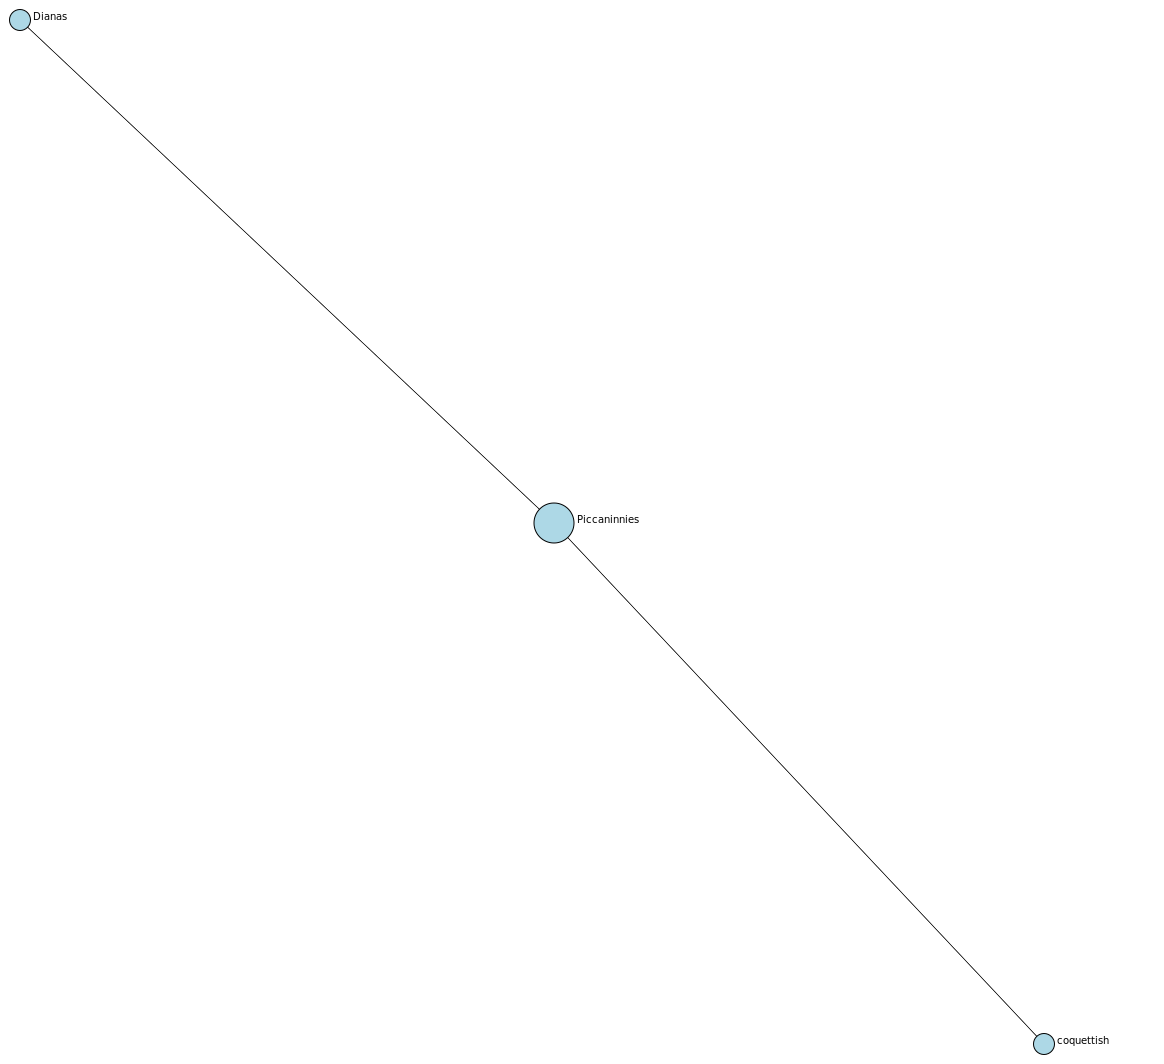

In [378]:
components = list(nx.connected_components(G)) 

main_component = components[4] 

G_sub = G.subgraph(main_component) 

draw_graph(G_sub, show_names=True, node_size=4, edge_width=0.5) 